# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [168]:
# Libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Challenge 1 - Import and Describe the Dataset

#### In this challenge we will use the `austin_weather` data. 

#### First, import it into a data frame called `austin`. 

In [75]:
# Your code here
austin=pd.read_csv("austin_weather.csv")
austin.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [76]:
df=austin.copy()

#### Next, describe the dataset you have loaded: 
- Look at the variables and their types
- Examine the descriptive statistics of the numeric variables 
- Look at the first five rows of all variables to evaluate the categorical variables as well

In [77]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [78]:
# Your code here
df.nunique()

Date                          1319
TempHighF                       74
TempAvgF                        64
TempLowF                        61
DewPointHighF                   64
DewPointAvgF                    66
DewPointLowF                    73
HumidityHighPercent             58
HumidityAvgPercent              69
HumidityLowPercent              82
SeaLevelPressureHighInches     105
SeaLevelPressureAvgInches      101
SeaLevelPressureLowInches      105
VisibilityHighMiles              5
VisibilityAvgMiles              10
VisibilityLowMiles              12
WindHighMPH                     22
WindAvgMPH                      13
WindGustMPH                     37
PrecipitationSumInches         114
Events                           9
dtype: int64

In [79]:
# Your code here
df.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


#### Given the information you have learned from examining the dataset, write down three insights about the data in a markdown cell below

#### Your Insights:

1. There are 21 variables in the dataset. 3 of them are numeric and the rest contain some text.

2. The average temperature in Austin ranged between around 70 degrees F and around 93 degrees F. The highest temperature observed during this period was 107 degrees F and the lowest was 19 degrees F.

3. When we look at the head function, we see that a lot of variables contain numeric data even though these columns are of object type. This means we might have to do some data cleansing.


#### Let's examine the DewPointAvgF variable by using the `unique()` function to list all unique values in this dataframe.

Describe what you find in a markdown cell below the code. What did you notice? What do you think made Pandas to treat this column as *object* instead of *int64*? 

In [80]:
# Your code here
df.DewPointAvgF.unique()

array(['49', '36', '27', '28', '40', '39', '41', '26', '42', '22', '48',
       '32', '8', '11', '45', '55', '61', '37', '47', '25', '23', '20',
       '33', '30', '29', '17', '14', '13', '54', '59', '15', '24', '34',
       '35', '57', '50', '53', '60', '46', '56', '51', '31', '38', '62',
       '43', '63', '64', '67', '66', '58', '70', '68', '65', '69', '71',
       '72', '-', '73', '74', '21', '44', '52', '12', '75', '76', '18'],
      dtype=object)

In [81]:
# Your observation here 
# There is a hyphen that is preventing pandas
# to convert the column to numeric type

The following is a list of columns misrepresented as `object`. Use this list to convert the columns to numeric using the `pandas.to_numeric` function in the next cell. If you encounter errors in converting strings to numeric values, you need to catch those errors and force the conversion by supplying `errors='coerce'` as an argument for `pandas.to_numeric`. Coercing will replace non-convertable elements with `NaN` which represents an undefined numeric value. This makes it possible for us to conveniently handle missing values in subsequent data processing.

*Hint: you may use a loop to change one column at a time but it is more efficient to use `apply`.*

In [82]:
wrong_type_columns = ['DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 
                      'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 
                      'SeaLevelPressureAvgInches' ,'SeaLevelPressureLowInches', 'VisibilityHighMiles',
                      'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 
                      'WindGustMPH', 'PrecipitationSumInches']

In [83]:
# Your code here
df1=df.copy()


#### Check if your code has worked by printing the data types again. You should see only two `object` columns (`Date` and `Events`) now. All other columns should be `int64` or `float64`.

In [84]:
# Your code here
df1[wrong_type_columns]=df1[wrong_type_columns].apply(pd.to_numeric, errors="coerce")

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1312 non-null   float64
 5   DewPointAvgF                1312 non-null   float64
 6   DewPointLowF                1312 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1317 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1316 non-null   float64
 11  SeaLevelPressureAvgInches   1316 non-null   float64
 12  SeaLevelPressureLowInches   1316 non-null   float64
 13  VisibilityHighMiles         1307 

# Challenge 2 - Handle the Missing Data

#### Now that we have fixed the type mismatch, let's address the missing data.

By coercing the columns to numeric, we have created `NaN` for each cell containing characters. We should choose a strategy to address these missing data.

The first step is to examine how many rows contain missing data.

We check how much missing data we have by applying the `.isnull()` function to our dataset. To find the rows with missing data in any of its cells, we apply `.any(axis=1)` to the function. `austin.isnull().any(axis=1)` will return a column containing true if the row contains at least one missing value and false otherwise. Therefore we must subset our dataframe with this column. This will give us all rows with at least one missing value. 

#### In the next cell, identify all rows containing at least one missing value. Assign the dataframes with missing values to a variable called `missing_values`.

In [86]:
df2=df1.copy()

In [87]:
# Your code here
df2["null"]=df2.isnull().any(axis=1)

In [88]:
df2.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,null
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm",False
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00,,False
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00,,False
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00,,False
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,NaN,,True


In [89]:
df2_null=df2[df2["null"]==True]
df2_null.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,null
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,NaN,,True
6,2013-12-27,60,53,45,41.0,39.0,37.0,83.0,65.0,47.0,30.46,30.39,30.34,10.0,9.0,7.0,7.0,1.0,11.0,NaN,,True
7,2013-12-28,62,51,40,43.0,39.0,33.0,92.0,64.0,36.0,30.33,30.17,30.04,10.0,10.0,7.0,10.0,2.0,14.0,NaN,,True
42,2014-02-01,76,66,55,62.0,59.0,41.0,81.0,71.0,60.0,29.91,29.81,29.75,10.0,10.0,9.0,14.0,6.0,26.0,NaN,Rain,True
51,2014-02-10,60,48,35,49.0,36.0,30.0,82.0,74.0,66.0,30.23,30.15,30.02,10.0,8.0,4.0,15.0,9.0,23.0,NaN,Rain,True


There are multiple strategies to handle missing data. Below lists the most common ones data scientists use:

* Removing all rows or all columns containing missing data. This is the simplest strategy. It may work in some cases but not others.

* Filling all missing values with a placeholder value. 
    * For categorical data, `0`, `-1`, and `9999` are some commonly used placeholder values. 
    * For continuous data, some may opt to fill all missing data with the mean. This strategy is not optimal since it can increase the fit of the model.

* Filling the values using some algorithm. 

#### In our case, we will use a hybrid approach which is to first remove the data that contain most missing values then fill in the rest of the missing values with the *linear interpolation* algorithm.

#### Next, count the number of rows of `austin` and `missing_values`.

In [90]:
# Your code here
len(df2_null)

136

#### Calculate the ratio of missing rows to total rows

In [91]:
# Your code here
len(df2_null)/len(df2)

0.10310841546626232

As you can see, there is a large proportion of missing data (over 10%). Perhaps we should evaluate which columns have the most missing data and remove those columns. For the remaining columns, we will perform a linear approximation of the missing data.

We can find the number of missing rows in each column using the `.isna()` function. We then chain the `.sum` function to the `.isna()` function and find the number of missing rows per column

In [92]:
# Your code here
df2.columns=df2.columns.str.lower().str.replace(" ","_")

In [93]:
df2.columns.to_list()

['date',
 'temphighf',
 'tempavgf',
 'templowf',
 'dewpointhighf',
 'dewpointavgf',
 'dewpointlowf',
 'humidityhighpercent',
 'humidityavgpercent',
 'humiditylowpercent',
 'sealevelpressurehighinches',
 'sealevelpressureavginches',
 'sealevelpressurelowinches',
 'visibilityhighmiles',
 'visibilityavgmiles',
 'visibilitylowmiles',
 'windhighmph',
 'windavgmph',
 'windgustmph',
 'precipitationsuminches',
 'events',
 'null']

In [94]:
df2.isna().sum()

date                            0
temphighf                       0
tempavgf                        0
templowf                        0
dewpointhighf                   7
dewpointavgf                    7
dewpointlowf                    7
humidityhighpercent             2
humidityavgpercent              2
humiditylowpercent              2
sealevelpressurehighinches      3
sealevelpressureavginches       3
sealevelpressurelowinches       3
visibilityhighmiles            12
visibilityavgmiles             12
visibilitylowmiles             12
windhighmph                     2
windavgmph                      2
windgustmph                     4
precipitationsuminches        124
events                          0
null                            0
dtype: int64

#### As you can see from the output, the majority of missing data is in one column called `PrecipitationSumInches`. What's the number of missing values in this column in ratio to its total number of rows?

In [95]:
# Your code here
df2.precipitationsuminches.isna().sum()/len(df2.precipitationsuminches)

0.09401061410159212

Almost 10% data missing! Therefore, we prefer to remove this column instead of filling its missing values. 

#### Remove this column from `austin` using the `.drop()` function. Use the `inplace=True` argument.

*Hints:*

* By supplying `inplace=True` to `drop()`, the original dataframe object will be changed in place and the function will return `None`. In contrast, if you don't supply `inplace=True`, which is equivalent to supplying `inplace=False` because `False` is the default value, the original dataframe object will be kept and the function returns a copy of the transformed dataframe object. In the latter case, you'll have to assign the returned object back to your variable.

* Also, since you are dropping a column instead of a row, you'll need to supply `axis=1` to `drop()`.

[Reference for `pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [96]:
# Your code here 
df3=df2.copy()
df3=df3.drop(columns="precipitationsuminches")
# Print `austin` to confirm the column is indeed removed

df3

,date,temphighf,tempavgf,templowf,dewpointhighf,dewpointavgf,dewpointlowf,humidityhighpercent,humidityavgpercent,humiditylowpercent,sealevelpressurehighinches,sealevelpressureavginches,sealevelpressurelowinches,visibilityhighmiles,visibilityavgmiles,visibilitylowmiles,windhighmph,windavgmph,windgustmph,events,null
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",False
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,,False
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,,False
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,,False
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,,False
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,,False
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,,False
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,,False


In [97]:
df3.events.eq(" ").sum() ## OJO CUIDAO, 
                        ## Tendremos que limpiar
                        ## cuando lo mande el lab

903

#### Next we will perform linear interpolation of the missing data.

This means that we will use a linear algorithm to estimate the missing data. Linear interpolation assumes that there is a straight line between the points and the missing point will fall on that line. This is a good enough approximation for weather related data. Weather related data is typically a time series. Therefore, we do not want to drop rows from our data if possible. It is prefereable to estimate the missing values rather than remove the rows. However, if you have data from a single point in time, perhaps a better solution would be to remove the rows. 

If you would like to read more about linear interpolation, you can do so [here](https://en.wikipedia.org/wiki/Linear_interpolation).

In the following cell, use the `.interpolate()` function on the entire dataframe. This time pass the `inplace=False` argument to the function and assign the interpolated dataframe to a new variable called `austin_fixed` so that we can compare with `austin`.

In [98]:
# Your code here
df4=df3.copy()
df4_fixed=df4.interpolate()

/tmp/ipykernel_58698/4278860520.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df4_fixed=df4.interpolate()


#### Check to make sure `austin_fixed` contains no missing data. Also check `austin` - it still contains missing data.

In [99]:
# Your code here
df4_fixed.isnull().any(axis=1).sum()

0

In [100]:
df4.isnull().any(axis=1).sum()

14

# Challenge 3 - Processing the `Events` Column

#### Our dataframe contains one true text column - the Events column. We should evaluate this column to determine how to process it.

Use the `value_counts()` function to evaluate the contents of this column

In [101]:
# Your code here:
df5=df4_fixed.copy()

Reading the values of `Events` and reflecting what those values mean in the context of data, you realize this column indicates what weather events had happened in a particular day.

#### What is the largest number of events happened in a single day? Enter your answer in the next cell.

In [102]:
# Your answer:
df5.events.value_counts()

events
                             903
Rain                         192
Rain , Thunderstorm          137
Fog , Rain , Thunderstorm     33
Fog                           21
Thunderstorm                  17
Fog , Rain                    14
Rain , Snow                    1
Fog , Thunderstorm             1
Name: count, dtype: int64

#### We want to transform the string-type `Events` values to the numbers. This will allow us to apply machine learning algorithms easily.

How? We will create a new column for each type of events (i.e. *Rain*, *Snow*, *Fog*, *Thunderstorm*. In each column, we use `1` to indicate if the corresponding event happened in that day and use `0` otherwise.

Below we provide you a list of all event types. Loop the list and create a dummy column with `0` values for each event in `austin_fixed`. To create a new dummy column with `0` values, simply use `austin_fixed[event] = 0`.

In [103]:
# df5["events"]=df5["events"].replace(" ",0)
# df5["events"] = df5["events"].str.split(", ")


In [104]:
df6=df5.copy()

In [105]:
event_list = ['snow', 'fog', 'rain', 'thunderstorm']

# Your code here
for event in event_list:
    df6[event]=0

#### Next, populate the actual values in the dummy columns of  `austin_fixed`.

You will check the *Events* column. If its string value contains `Rain`, then the *Rain* column should be `1`. The same for `Snow`, `Fog`, and `Thunderstorm`.

*Hints:*

* Use [`pandas.Series.str.contains()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html) to create the value series of each new column.

* What if the values you populated are booleans instead of numbers? You can cast the boolean values to numbers by using `.astype(int)`. For instance, `pd.Series([True, True, False]).astype(int)` will return a new series with values of `[1, 1, 0]`.

#### Print out `austin_fixed` to check if the event columns are populated with the intended values

In [106]:
df6["rain"] = df6["events"].str.contains("Rain", na=False).astype(int)
df6["snow"] = df6["events"].str.contains("Snow", na=False).astype(int)
df6["fog"] = df6["events"].str.contains("Fog", na=False).astype(int)
df6["thunderstorm"] = df6["events"].str.contains("Thunderstorm", na=False).astype(int)
df6.rain=df6.rain.fillna(0)
df6.snow=df6.snow.fillna(0)
df6.fog=df6.fog.fillna(0)
df6.thunderstorm=df6.thunderstorm.fillna(0)

In [107]:
df6.head()

,date,temphighf,tempavgf,templowf,dewpointhighf,dewpointavgf,dewpointlowf,humidityhighpercent,humidityavgpercent,humiditylowpercent,sealevelpressurehighinches,sealevelpressureavginches,sealevelpressurelowinches,visibilityhighmiles,visibilityavgmiles,visibilitylowmiles,windhighmph,windavgmph,windgustmph,events,null,snow,fog,rain,thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",False,0,0,1,1
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,,False,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,,False,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,,False,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,,True,0,0,0,0


In [108]:
## Solución de Fer. No me va 
# a funcionar porque estandaricé columnas y los eventos
# (valores) están capitalizados pero el nombre de 
# columna, no. 
# for event in event_list:
#     df6[event] = df6["events"].str.contains(event,na=False).astype(int)

#### If your code worked correctly, now we can drop the `Events` column as we don't need it any more.

In [109]:
df6.head()

,date,temphighf,tempavgf,templowf,dewpointhighf,dewpointavgf,dewpointlowf,humidityhighpercent,humidityavgpercent,humiditylowpercent,sealevelpressurehighinches,sealevelpressureavginches,sealevelpressurelowinches,visibilityhighmiles,visibilityavgmiles,visibilitylowmiles,windhighmph,windavgmph,windgustmph,events,null,snow,fog,rain,thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",False,0,0,1,1
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,,False,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,,False,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,,False,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,,True,0,0,0,0


In [110]:
# Your code here
df6=df6.drop(columns="events")


In [111]:

df6.head()

,date,temphighf,tempavgf,templowf,dewpointhighf,dewpointavgf,dewpointlowf,humidityhighpercent,humidityavgpercent,humiditylowpercent,sealevelpressurehighinches,sealevelpressureavginches,sealevelpressurelowinches,visibilityhighmiles,visibilityavgmiles,visibilitylowmiles,windhighmph,windavgmph,windgustmph,null,snow,fog,rain,thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,False,0,0,1,1
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,False,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,False,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,False,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,True,0,0,0,0


# Challenge 4 - Processing The `Date` Column

The `Date` column is another non-numeric field in our dataset. A value in that field looks like `'2014-01-06'` which consists of the year, month, and day connected with hyphens. One way to convert the date string to numerical is using a similar approach as we used for `Events`, namely splitting the column into numerical `Year`, `Month`, and `Day` columns. In this challenge we'll show you another way which is to use the Python `datetime` library's `toordinal()` function. Depending on what actual machine learning analysis you will conduct, each approach has its pros and cons. Our goal today is to practice data preparation so we'll skip the discussion here.

Here you can find the [reference](https://docs.python.org/3/library/datetime.html) and [example](https://stackoverflow.com/questions/39846918/convert-date-to-ordinal-python) for `toordinal`. The basic process is to first convert the string to a `datetime` object using `datetime.datetime.strptime`, then convert the `datetime` object to numerical using `toordinal`.

#### In the cell below, convert the `Date` column values from string to numeric values using `toordinal()`.

In [112]:
# Your code here
df7=df6.copy()
df7.date=pd.to_datetime(df7.date)

In [113]:
## TO DATETIME FUNCIONA POR COLUMNA PERO TOORDINAL
## FUNCIONA LINEA A LINEA, POR ESO LE TENEMOS QUE
## PASAR UN APPLY LAMBDA
from datetime import datetime
df7.date=df7['date'].apply(lambda x: x.toordinal())


#### Print `austin_fixed` to check your `Date` column.

In [114]:

df7.head()

,date,temphighf,tempavgf,templowf,dewpointhighf,dewpointavgf,dewpointlowf,humidityhighpercent,humidityavgpercent,humiditylowpercent,sealevelpressurehighinches,sealevelpressureavginches,sealevelpressurelowinches,visibilityhighmiles,visibilityavgmiles,visibilitylowmiles,windhighmph,windavgmph,windgustmph,null,snow,fog,rain,thunderstorm
0,735223,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,False,0,0,1,1
1,735224,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,False,0,0,0,0
2,735225,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,False,0,0,0,0
3,735226,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,False,0,0,0,0
4,735227,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,True,0,0,0,0


# Challenge 5 - Sampling and Holdout Sets

#### Now that we have processed the data for machine learning, we will separate the data to test and training sets.

We first train the model using only the training set. We check our metrics on the training set. We then apply the model to the test set and check our metrics on the test set as well. If the metrics are significantly more optimal on the training set, then we know we have overfit our model. We will need to revise our model to ensure it will be more applicable to data outside the test set.

#### In the next cells we will separate the data into a training set and a test set using the `train_test_split()` function in scikit-learn.

When using `scikit-learn` for machine learning, we first separate the data to predictor and response variables. This is the standard way of passing datasets into a model in `scikit-learn`. The `scikit-learn` will then find out whether the predictors and responses fit the model.

In the next cell, assign the `TempAvgF` column to `y` and the remaining columns to `X`. Your `X` should be a subset of `austin_fixed` containing the following columns: 

```['Date',
 'TempHighF',
 'TempLowF',
 'DewPointHighF',
 'DewPointAvgF',
 'DewPointLowF',
 'HumidityHighPercent',
 'HumidityAvgPercent',
 'HumidityLowPercent',
 'SeaLevelPressureHighInches',
 'SeaLevelPressureAvgInches',
 'SeaLevelPressureLowInches',
 'VisibilityHighMiles',
 'VisibilityAvgMiles',
 'VisibilityLowMiles',
 'WindHighMPH',
 'WindAvgMPH',
 'WindGustMPH',
 'Snow',
 'Fog',
 'Rain',
 'Thunderstorm']```
 
 Your `y` should be a subset of `austin_fixed` containing one column `TempAvgF`.

In [115]:
# Your code here:
y=df7.tempavgf
X=df7.drop(columns="tempavgf")

In the next cell, import `train_test_split` from `sklearn.model_selection`

In [116]:
# 🤖 Machine Learning
from sklearn.model_selection import train_test_split # ❗ New

Now that we have split the data to predictor and response variables and imported the `train_test_split()` function, split `X` and `y` into `X_train`, `X_test`, `y_train`, and `y_test`. 80% of the data should be in the training set and 20% in the test set. `train_test_split()` reference can be accessed [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).


Enter your code in the cell below:

In [117]:
#Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Congratulations! Now you have finished the preparation of the dataset!

# Bonus Challenge 1

#### While the above is the common practice to prepare most datasets, when it comes to time series data, we sometimes do not want to randomly select rows from our dataset.

This is because many time series algorithms rely on observations having equal time distances between them. In such cases, we typically select the majority of rows as the test data and the last few rows as the training data. We don't use `train_test_split()` to select the train/test data because it returns random selections.

In the following cell, compute the number of rows that account for 80% of our data and round it to the next integer. Assign this number to `ts_rows`.

In [118]:
# Your code here:
ts_rows=round(len(df7)/100*80)
ts_rows

1055

Assign the first `ts_rows` rows of `X` to `X_ts_train` and the remaining rows to `X_ts_test`.

Assign the first `ts_rows` rows of `y` to `y_ts_train` and the remaining rows to `y_ts_test`.

Hay un parámetro en train_test_split que es suffle=False, que si lo ponemos así, impide la randomización de la toma del test y del train. Pero intentaremos hacerlo según aquí se especifica.


In [119]:
# Your code here:
X_ts_train, X_ts_test, y_ts_train, y_ts_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [120]:
X_ts_train

,date,temphighf,templowf,dewpointhighf,dewpointavgf,dewpointlowf,humidityhighpercent,humidityavgpercent,humiditylowpercent,sealevelpressurehighinches,sealevelpressureavginches,sealevelpressurelowinches,visibilityhighmiles,visibilityavgmiles,visibilitylowmiles,windhighmph,windavgmph,windgustmph,null,snow,fog,rain,thunderstorm
0,735223,74,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,False,0,0,1,1
1,735224,56,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,False,0,0,0,0
2,735225,58,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,False,0,0,0,0
3,735226,61,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,False,0,0,0,0
4,735227,58,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,True,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,736273,72,63,68.0,66.0,59.0,100.0,91.0,81.0,30.27,30.22,30.14,10.0,6.0,1.0,7.0,2.0,12.0,False,0,0,1,0
1051,736274,76,59,67.0,60.0,57.0,93.0,85.0,76.0,30.19,30.13,30.07,10.0,10.0,5.0,12.0,2.0,20.0,False,0,0,1,0
1052,736275,71,61,69.0,65.0,61.0,100.0,94.0,87.0,30.14,30.09,30.04,10.0,5.0,1.0,7.0,2.0,12.0,False,0,0,1,0
1053,736276,69,62,66.0,64.0,62.0,100.0,92.0,84.0,30.21,30.16,30.09,10.0,8.0,2.0,10.0,4.0,16.0,False,0,0,1,1


In [121]:
## Método diana/ fer

X_ts_train_2=X.iloc[:ts_rows]
X_ts_test_2=X.iloc[ts_rows:]
y_ts_train_2=y.iloc[:ts_rows]
y_ts_test_2=y.iloc[ts_rows]

In [122]:
X_ts_train==X_ts_train_2

,date,temphighf,templowf,dewpointhighf,dewpointavgf,dewpointlowf,humidityhighpercent,humidityavgpercent,humiditylowpercent,sealevelpressurehighinches,sealevelpressureavginches,sealevelpressurelowinches,visibilityhighmiles,visibilityavgmiles,visibilitylowmiles,windhighmph,windavgmph,windgustmph,null,snow,fog,rain,thunderstorm
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1051,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1052,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1053,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


Hemos comprobado que ambos métodos funcionan bien 

# <h1 style="color: #FF8C00;"> Modeling</h1>

## <h2 style="color: #FF6347;">Selecting the Model: Linear Regression</h2>

In [123]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## <h2 style="color: #FF6347;">Model Validation</h2>

In [124]:
predictions = model.predict(X_test)

In [125]:
print(f'30% for test prediction data: {len(predictions)}.')

30% for test prediction data: 264.


## <h3 style="color: #FF6347;">Metrics</h3>

In [126]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [127]:
#Printing the results
print("R2 = ", round(r2, 4))
print("RMSE = ", round(RMSE, 4))
print("The value of the metric MSE is ", round(MSE, 4))
print("MAE = ", round(MAE, 4))

R2 =  0.9971
RMSE =  0.7744
The value of the metric MSE is  0.5997
MAE =  0.3028


# <h1 style="color: #FF8C00;">Checking correlations</h1>

In [181]:
df7.corrwith(df7["tempavgf"]).sort_values(ascending=False)

tempavgf                      1.000000
temphighf                     0.970655
templowf                      0.968573
dewpointavgf                  0.895697
dewpointhighf                 0.881691
dewpointlowf                  0.864774
humidityhighpercent           0.214461
visibilityavgmiles            0.210626
date                          0.191919
visibilitylowmiles            0.113729
thunderstorm                  0.093157
visibilityhighmiles           0.090969
windavgmph                    0.040446
windgustmph                   0.034515
humidityavgpercent            0.031632
null                          0.024071
windhighmph                   0.023317
fog                          -0.033069
snow                         -0.056192
humiditylowpercent           -0.092830
rain                         -0.105935
sealevelpressurelowinches    -0.537832
sealevelpressureavginches    -0.624401
sealevelpressurehighinches   -0.696277
dtype: float64

# <h1 style="color: #FF8C00;">Improving the Model</h1>

## <h2 style="color: #FF6347;">Selecting the Model: Ridge Regression</h2>

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

## <h2 style="color: #FF6347;">Model Validation</h2>

In [130]:
predictions_ridge = ridge.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [131]:
r2_ridge = r2_score(y_test, predictions_ridge)
RMSE_ridge = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_ridge = mean_squared_error(y_test, predictions_ridge)
MAE_ridge = mean_absolute_error(y_test, predictions_ridge)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [132]:
#Printing the results
print("R2 = ", round(r2_ridge, 4))
print("RMSE = ", round(RMSE_ridge, 4))
print("The value of the metric MSE is ", round(MSE_ridge, 4))
print("MAE = ", round(MAE_ridge, 4))

R2 =  0.9971
RMSE =  0.7745
The value of the metric MSE is  0.5999
MAE =  0.3027


## <h2 style="color: #FF6347;">Selecting the Model: Lasso Regression</h2>

In [133]:
from sklearn.linear_model import Lasso

In [134]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

## <h2 style="color: #FF6347;">Model Validation</h2>

In [135]:
predictions_lasso = lasso.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [136]:
r2_lasso = r2_score(y_test, predictions_lasso)
RMSE_lasso = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_lasso= mean_squared_error(y_test, predictions_lasso)
MAE_lasso = mean_absolute_error(y_test, predictions_lasso)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [137]:
#Printing the results
print("R2 = ", round(r2_lasso, 4))
print("RMSE = ", round(RMSE_lasso, 4))
print("The value of the metric MSE is ", round(MSE_lasso, 4))
print("MAE = ", round(MAE_lasso, 4))

R2 =  0.997
RMSE =  0.7822
The value of the metric MSE is  0.6118
MAE =  0.3032


## <h2 style="color: #FF6347;">Selecting the Model: Decision Tree Regression</h2>

In [138]:
from sklearn.tree import DecisionTreeRegressor

In [139]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

## <h2 style="color: #FF6347;">Model Validation</h2>

In [140]:
predictions_tree = tree.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [141]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [142]:
#Printing the results
print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  0.9913
RMSE =  1.3385
The value of the metric MSE is  1.7917
MAE =  0.7538


## <h2 style="color: #FF6347;">Selecting the Model: KNN Regression</h2>

In [143]:
from sklearn.neighbors import KNeighborsRegressor

In [144]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

## <h2 style="color: #FF6347;">Model Validation</h2>

In [145]:
predictions_knn = knn.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [146]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_knn = mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [147]:
#Printing the results
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.9556
RMSE =  3.0257
The value of the metric MSE is  9.155
MAE =  2.2447


## <h2 style="color: #FF6347;">Selecting the Model: XGBoost Regression</h2>

In [148]:
import xgboost as xgb

In [151]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

## <h2 style="color: #FF6347;">Model Validation</h2>

In [152]:
predictions_xgb = xgbr.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [153]:
r2_boost = r2_score(y_test, predictions_xgb)
RMSE_boost = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_boost = mean_squared_error(y_test, predictions_xgb)
MAE_boost = mean_absolute_error(y_test, predictions_xgb)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [154]:
#Printing the results
print("R2 = ", round(r2_boost, 4))
print("RMSE = ", round(RMSE_boost, 4))
print("The value of the metric MSE is ", round(MSE_boost, 4))
print("MAE = ", round(MAE_boost, 4))

R2 =  0.9948
RMSE =  1.039
The value of the metric MSE is  1.0795
MAE =  0.616


<h2 style="color: #FF6347;">Final Comparison?</h2>

In [155]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_boost],
    'RMSE': [RMSE, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_boost],
    'MSE': [MSE, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_boost],
    'MAE': [MAE, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_boost]
}

In [157]:
df_metrics = round(pd.DataFrame(metrics),5)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,0.99709,0.99709,0.99703,0.99131,0.95561,0.99477
RMSE,0.77442,0.77450,0.78216,1.33853,3.02572,1.03898
MSE,0.59972,0.59985,0.61177,1.79167,9.15500,1.07949
MAE,0.30278,0.30273,0.30320,0.75379,2.24470,0.61596


In [158]:
df7.columns.to_list()

['date',
 'temphighf',
 'tempavgf',
 'templowf',
 'dewpointhighf',
 'dewpointavgf',
 'dewpointlowf',
 'humidityhighpercent',
 'humidityavgpercent',
 'humiditylowpercent',
 'sealevelpressurehighinches',
 'sealevelpressureavginches',
 'sealevelpressurelowinches',
 'visibilityhighmiles',
 'visibilityavgmiles',
 'visibilitylowmiles',
 'windhighmph',
 'windavgmph',
 'windgustmph',
 'null',
 'snow',
 'fog',
 'rain',
 'thunderstorm']

# <h1 style="color: #FF6347;">Furhter improving the model...</h1>

<h2 style="color: #FF6347;">Normalization with MinMaxScaler</h2>

# <h2 style="color: #FF6347;">Improving it droppign multicollinearity features</h2>

### Método Oscar

VOY A DEJAR SOLO LAS COLUMNAS AVG, Y QUITARÉ LAS HIGH Y LAS LOW, YA QUE CREO QUE ESTÁN RETROALIMENTANDO LA TENDENCIA

In [215]:
X_new = X.drop(["temphighf","templowf","dewpointhighf","dewpointlowf","windgustmph","windhighmph","visibilitylowmiles","visibilityhighmiles","sealevelpressurelowinches","sealevelpressurehighinches","humiditylowpercent","humidityhighpercent"], axis=1)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Log transform

In [162]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [163]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [164]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.9593
RMSE =  2.8556
The value of the metric MSE is  8.1543
MAE =  2.0185


/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [183]:
df7.corrwith(df7["tempavgf"]).sort_values(ascending=False)

tempavgf                      1.000000
temphighf                     0.970655
templowf                      0.968573
dewpointavgf                  0.895697
dewpointhighf                 0.881691
dewpointlowf                  0.864774
humidityhighpercent           0.214461
visibilityavgmiles            0.210626
date                          0.191919
visibilitylowmiles            0.113729
thunderstorm                  0.093157
visibilityhighmiles           0.090969
windavgmph                    0.040446
windgustmph                   0.034515
humidityavgpercent            0.031632
null                          0.024071
windhighmph                   0.023317
fog                          -0.033069
snow                         -0.056192
humiditylowpercent           -0.092830
rain                         -0.105935
sealevelpressurelowinches    -0.537832
sealevelpressureavginches    -0.624401
sealevelpressurehighinches   -0.696277
dtype: float64

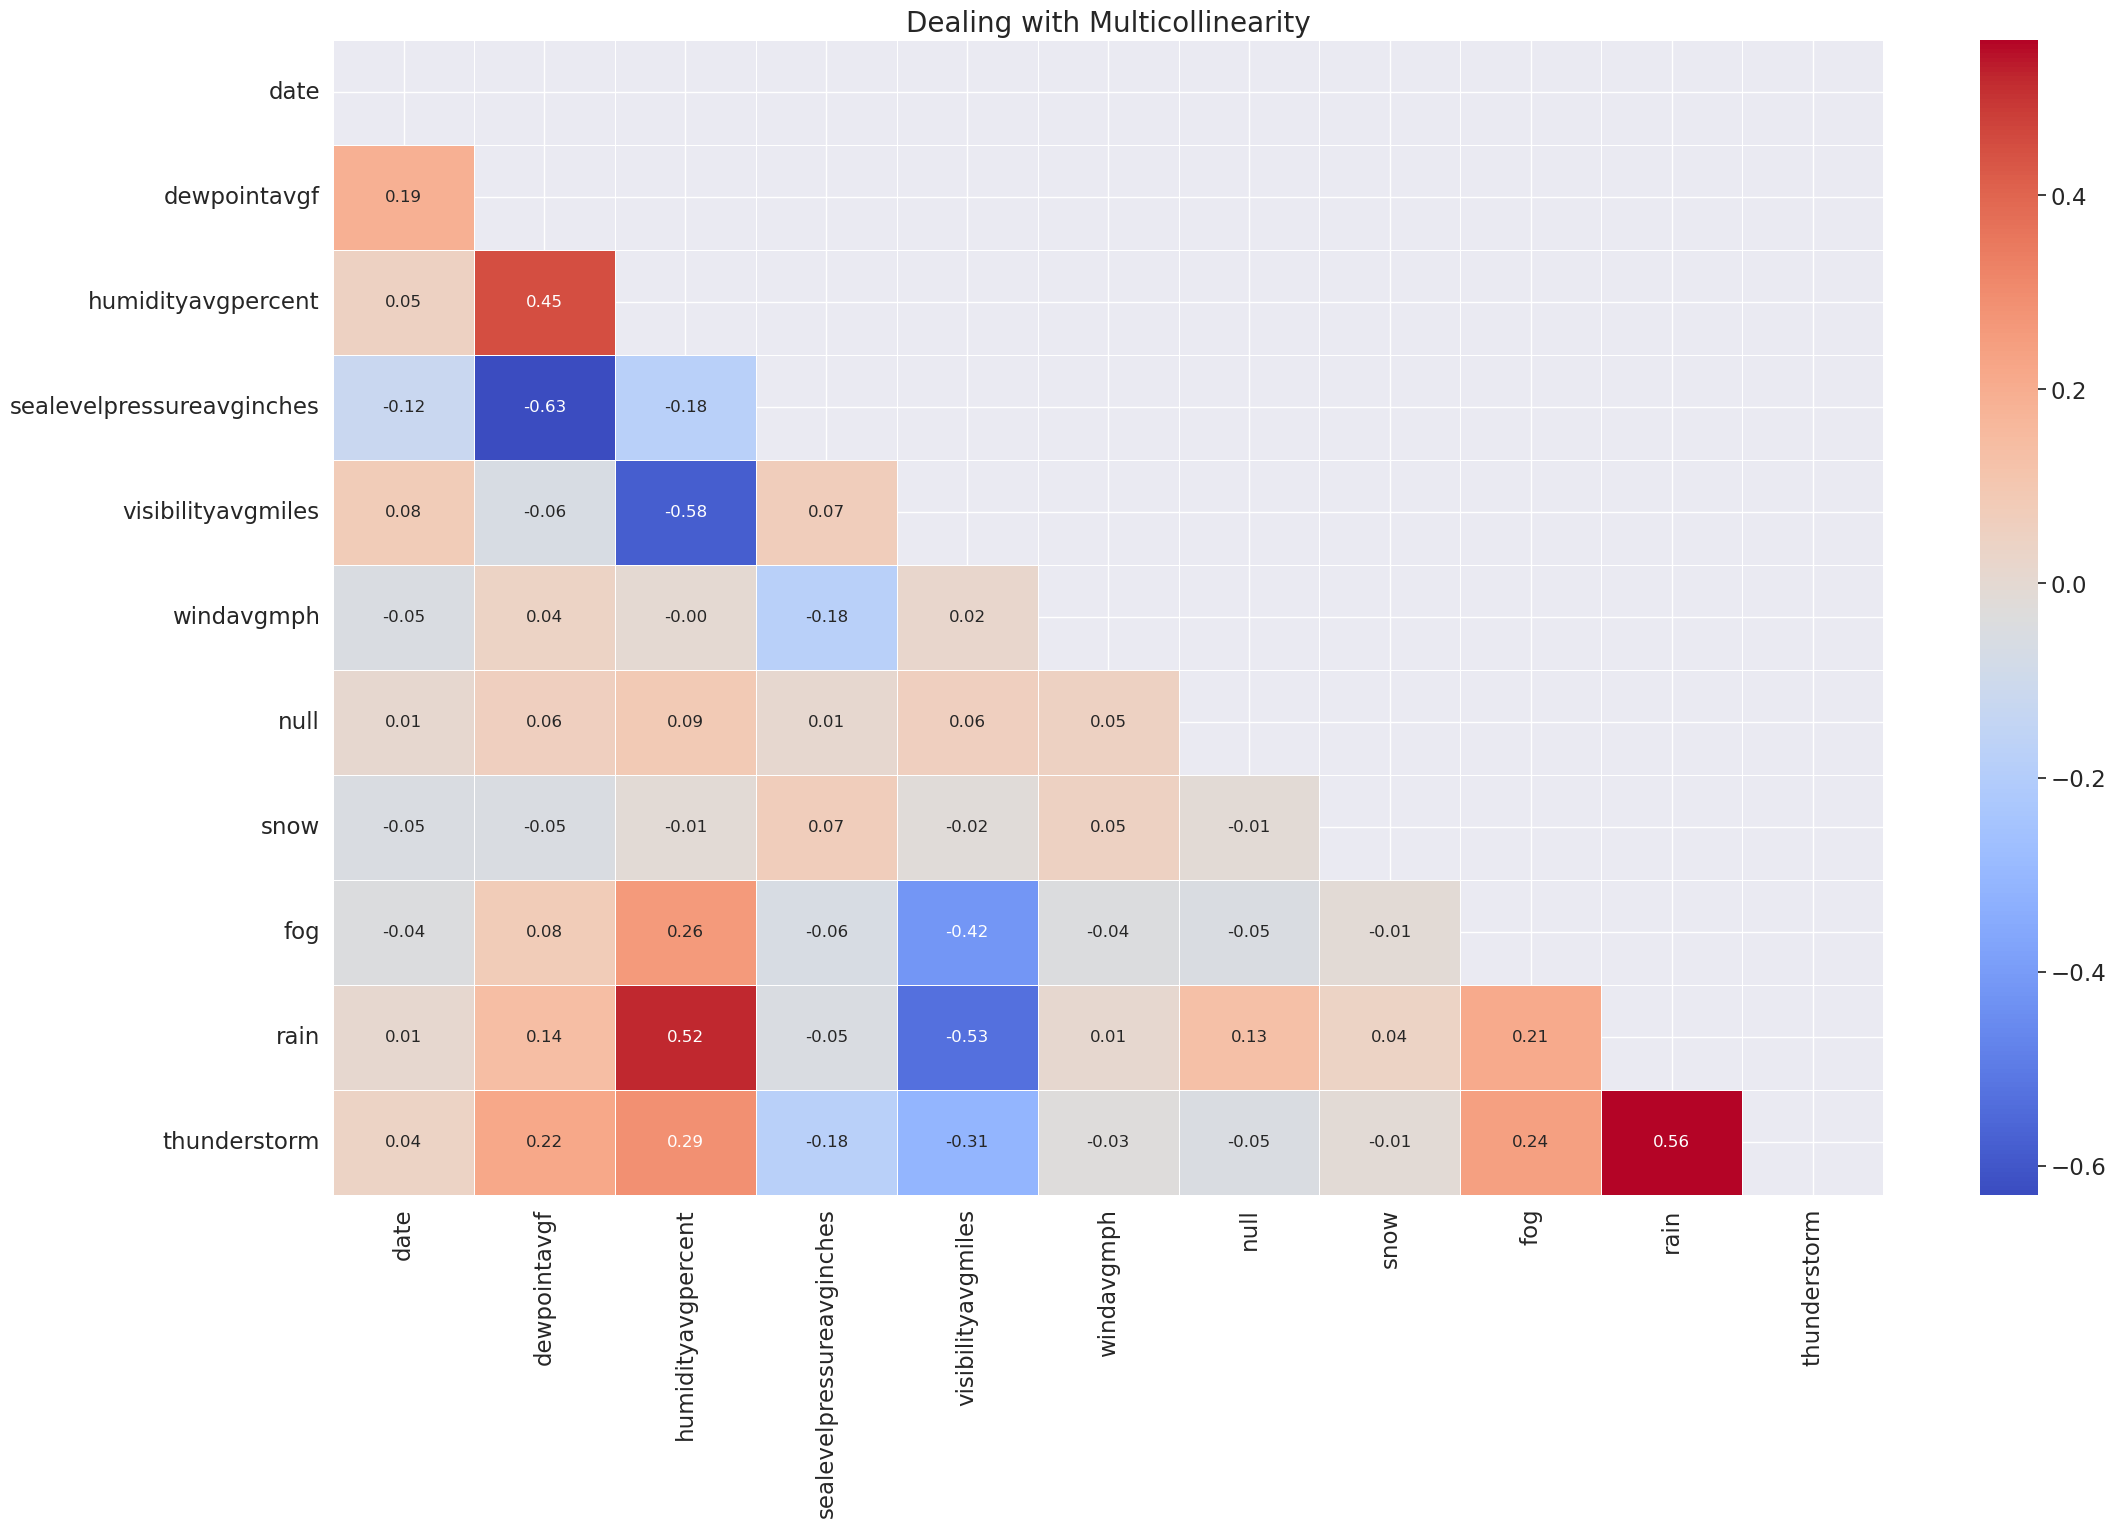

In [180]:
num_corr = round(X_new.corr(), 2)
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

Viendo que sigue teniendo mucha colinearidad "sealevelpressure" con "dewpoint" quito sea levelpressure ya que es la que menos correlación tiene con la target feature (tempavg). Lo mismo pasa con rain y humidityavgpercentage. Me cargo humidity ya que no es una dummy column.

In [216]:
X_new_2 = X_new.drop(["sealevelpressureavginches","humidityavgpercent"], axis=1)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_new_2, y, test_size=0.3, random_state=42)

In [218]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [219]:
predictions = model.predict(X_test)

In [220]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [221]:
#Printing the results
print("R2 = ", round(r2, 4))
print("RMSE = ", round(RMSE, 4))
print("The value of the metric MSE is ", round(MSE, 4))
print("MAE = ", round(MAE, 4))

R2 =  0.8835
RMSE =  4.8294
The value of the metric MSE is  23.3233
MAE =  3.7587


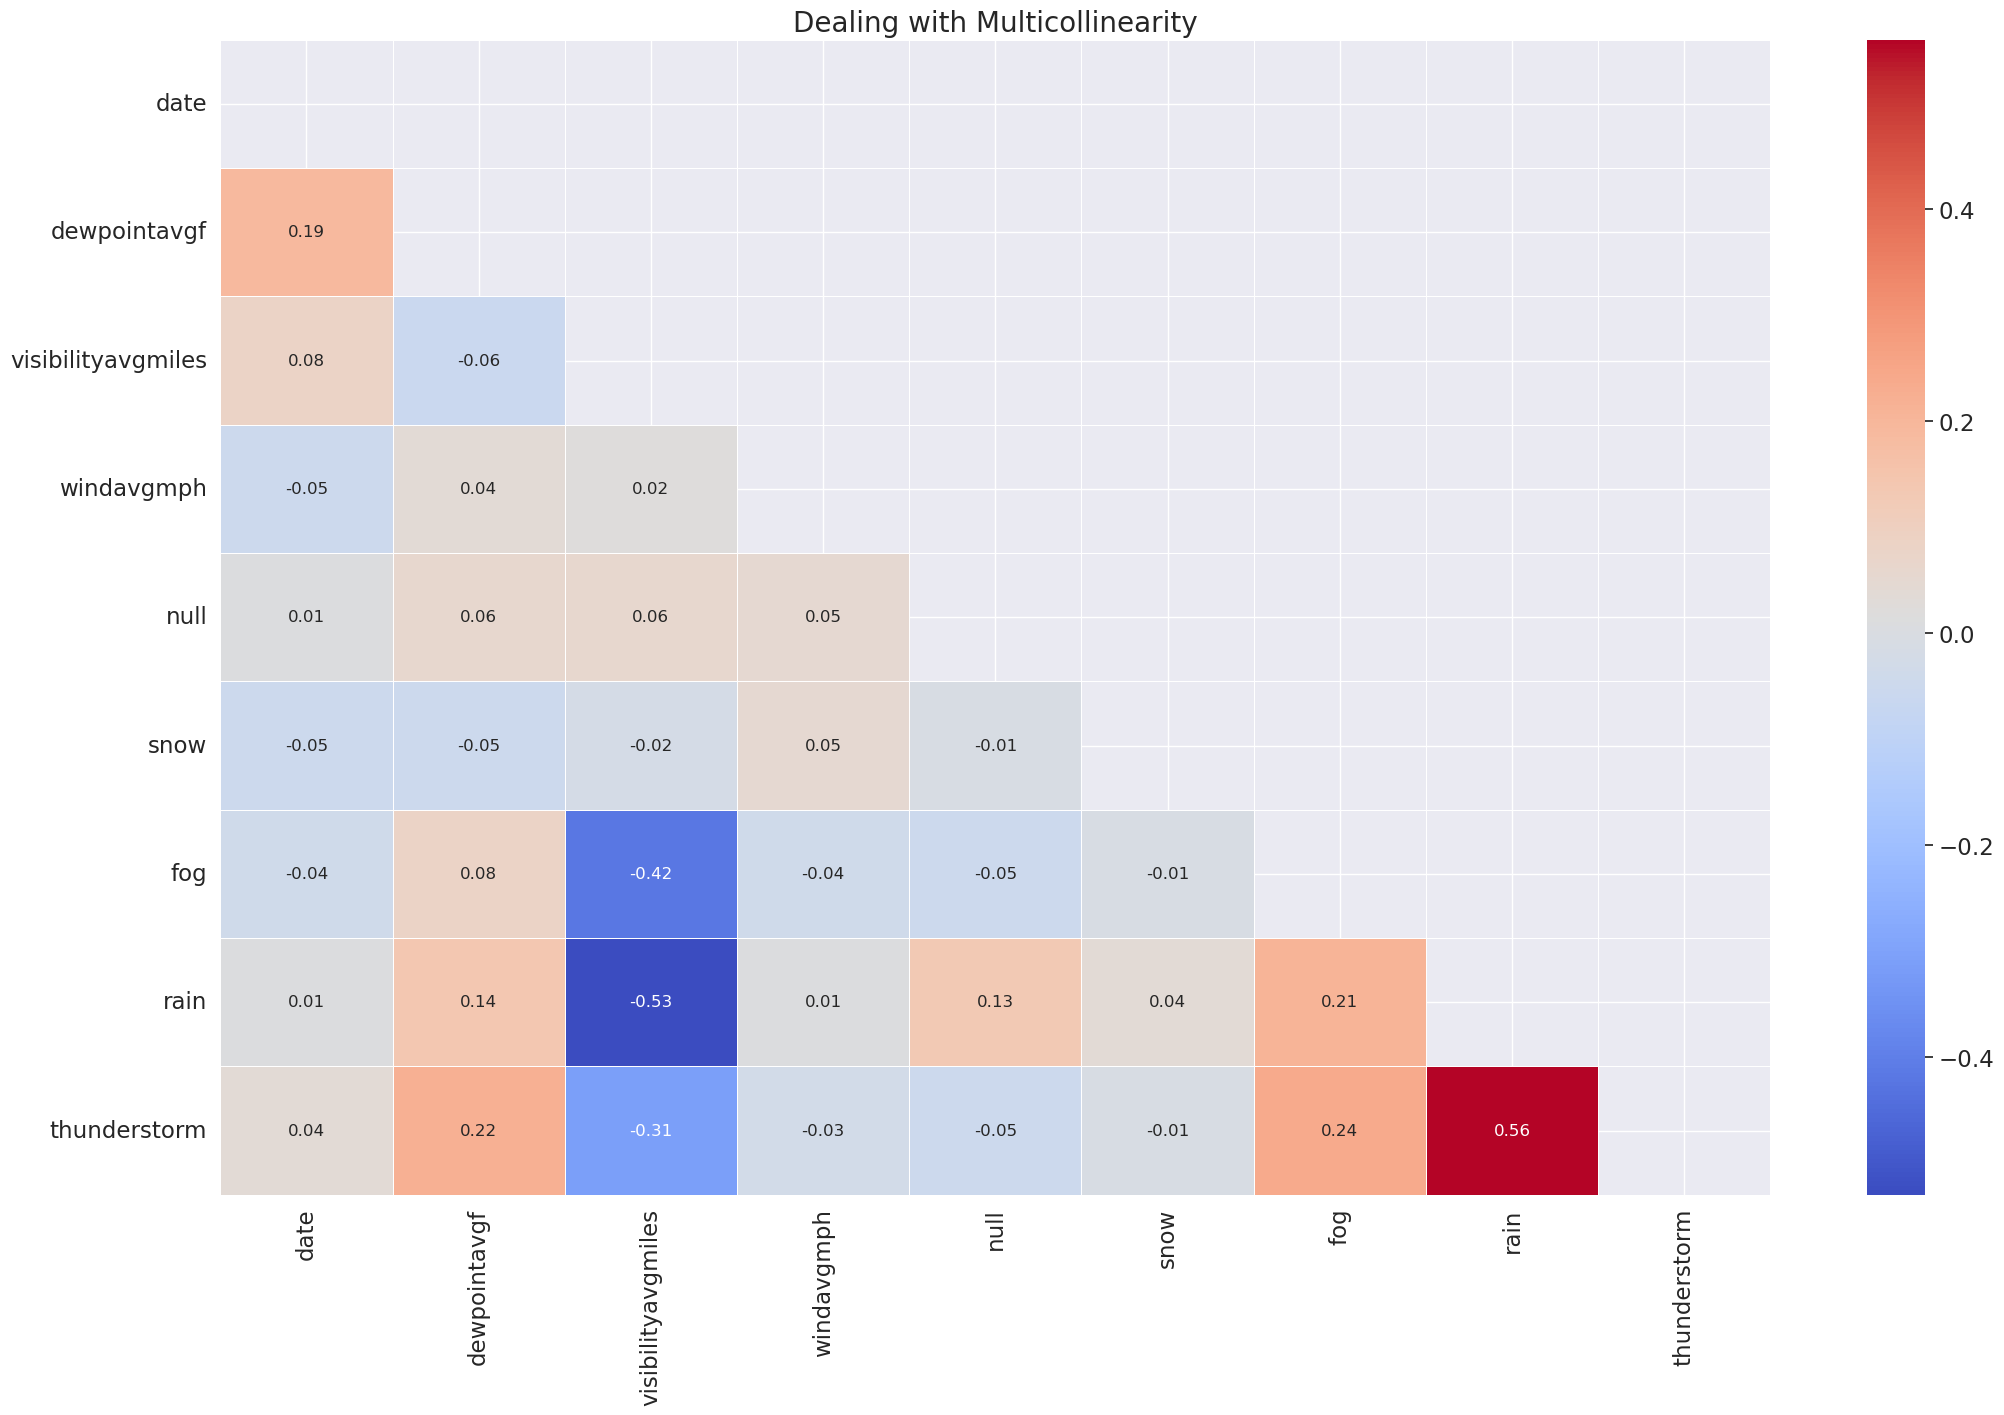

In [222]:
num_corr = round(X_new_2.corr(), 2)
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [224]:
X_new_2 = X_new_2.drop(["null"], axis=1)

## <h2 style="color: #FF6347;">Selecting the Model: Ridge Regression</h2>

In [227]:
from sklearn.linear_model import Ridge

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X_new_2, y, test_size=0.3, random_state=42)

In [229]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

## <h2 style="color: #FF6347;">Model Validation</h2>

In [230]:
predictions_ridge = ridge.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [231]:
r2_ridge = r2_score(y_test, predictions_ridge)
RMSE_ridge = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_ridge = mean_squared_error(y_test, predictions_ridge)
MAE_ridge = mean_absolute_error(y_test, predictions_ridge)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [232]:
#Printing the results
print("R2 = ", round(r2_ridge, 4))
print("RMSE = ", round(RMSE_ridge, 4))
print("The value of the metric MSE is ", round(MSE_ridge, 4))
print("MAE = ", round(MAE_ridge, 4))

R2 =  0.8835
RMSE =  4.8293
The value of the metric MSE is  23.322
MAE =  3.7635


## <h2 style="color: #FF6347;">Selecting the Model: Lasso Regression</h2>

In [233]:
from sklearn.linear_model import Lasso

In [234]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

<h2 style="color: #FF6347;">Model Validation</h2>

In [235]:
predictions_lasso = lasso.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [236]:
r2_lasso = r2_score(y_test, predictions_lasso)
RMSE_lasso = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_lasso= mean_squared_error(y_test, predictions_lasso)
MAE_lasso = mean_absolute_error(y_test, predictions_lasso)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [237]:
#Printing the results
print("R2 = ", round(r2_lasso, 4))
print("RMSE = ", round(RMSE_lasso, 4))
print("The value of the metric MSE is ", round(MSE_lasso, 4))
print("MAE = ", round(MAE_lasso, 4))

R2 =  0.8665
RMSE =  5.1711
The value of the metric MSE is  26.7405
MAE =  4.0819


![image.png](attachment:62cf3949-d3f1-4a92-bbdb-c8e85d9db29d.png)

<h2 style="color: #FF6347;">Selecting the Model: Decision Tree Regression</h2>

In [238]:
from sklearn.tree import DecisionTreeRegressor

In [239]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [240]:
predictions_tree = tree.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [241]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [242]:
#Printing the results
print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  0.8516
RMSE =  5.4511
The value of the metric MSE is  29.7146
MAE =  4.0025


### Linear Regression

![image.png](attachment:image.png)

![image.png](attachment:67e27663-eb14-4b55-bb19-79e7b93f10b6.png)

<h2 style="color: #FF6347;">Selecting the Model: KNN Regression</h2>

In [243]:
from sklearn.neighbors import KNeighborsRegressor

In [244]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

<h2 style="color: #FF6347;">Model Validation</h2>

In [245]:
predictions_knn = knn.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [246]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_knn = mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [247]:
#Printing the results
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.8903
RMSE =  4.6866
The value of the metric MSE is  21.9644
MAE =  3.3374


![image.png](attachment:image.png)

<h2 style="color: #FF6347;">Selecting the Model: XGBoost Regression</h2>

In [248]:
import xgboost as xgb

In [249]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

<h2 style="color: #FF6347;">Model Validation</h2>

In [250]:
predictions_xgb = xgbr.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [251]:
r2_boost = r2_score(y_test, predictions_xgb)
RMSE_boost = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_boost = mean_squared_error(y_test, predictions_xgb)
MAE_boost = mean_absolute_error(y_test, predictions_xgb)

/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [252]:
#Printing the results
print("R2 = ", round(r2_boost, 4))
print("RMSE = ", round(RMSE_boost, 4))
print("The value of the metric MSE is ", round(MSE_boost, 4))
print("MAE = ", round(MAE_boost, 4))

R2 =  0.8962
RMSE =  4.5603
The value of the metric MSE is  20.7962
MAE =  3.4211


<h2 style="color: #FF6347;">Final Comparison?</h2>

In [253]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_boost],
    'RMSE': [RMSE, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_boost],
    'MSE': [MSE, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_boost],
    'MAE': [MAE, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_boost]
}

In [254]:
df_metrics = round(pd.DataFrame(metrics),2)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,0.88,0.88,0.87,0.85,0.89,0.90
RMSE,4.83,4.83,5.17,5.45,4.69,4.56
MSE,23.32,23.32,26.74,29.71,21.96,20.80
MAE,3.76,3.76,4.08,4.00,3.34,3.42


<h1 style="color: #FF6347;">Furhter improving the model...</h1>

<h2 style="color: #FF6347;">Normalization with MinMaxScaler</h2>

In [255]:
from sklearn.preprocessing import MinMaxScaler 

In [256]:
scaler = MinMaxScaler()

In [257]:
X_train_scaled = scaler.fit_transform(X_train) ## SOlo transformamos las features! no la target, ya que no 
X_test_scaled = scaler.fit_transform(X_test)   ## podemos cambiar su magnitud, e igualmente el potencial de predicción
                                                ## permanece sobre "X"

In [258]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled) ## Obvio que el test tiene que ser también con los 
                                                ## valores escalados. 

In [259]:
r2_xg_sca = r2_score(y_test, predictions_xgb_2)
RMSE_xg_sca = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_sca = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_sca = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_sca, 4))
print("RMSE = ", round(RMSE_xg_sca, 4))
print("The value of the metric MSE is ", round(MSE_xg_sca, 4))
print("MAE = ", round(MAE_xg_sca, 4))

R2 =  0.9063
RMSE =  4.3314
The value of the metric MSE is  18.7606
MAE =  3.1161


/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h2 style="color: #FF6347;">Normalization with StandardScaler</h2>

In [260]:
from sklearn.preprocessing import StandardScaler

In [261]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [262]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [263]:
r2_xg_stand = r2_score(y_test, predictions_xgb_2)
RMSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_stand = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_stand, 4))
print("RMSE = ", round(RMSE_xg_stand, 4))
print("The value of the metric MSE is ", round(MSE_xg_stand, 4))
print("MAE = ", round(MAE_xg_stand, 4))

R2 =  0.9312
RMSE =  3.7125
The value of the metric MSE is  13.7829
MAE =  2.7019


/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h2 style="color: #FF6347;">Normalization with Log Transform</h2>

In [264]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [265]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [266]:
r2_xg_log = r2_score(y_test, predictions_xgb_2)
RMSE_xg_log = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_log = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_log = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_log, 4))
print("RMSE = ", round(RMSE_xg_log, 4))
print("The value of the metric MSE is ", round(MSE_xg_log, 4))
print("MAE = ", round(MAE_xg_log, 4))

R2 =  0.9312
RMSE =  3.7125
The value of the metric MSE is  13.7829
MAE =  2.7019


/home/eduardo/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


En la R cuadrado, el modelo que mayor índice tenía era el de XGBoost, y el modelo de escalado que nos ha dado una mayor R cuadrado ha sido "Log" y "Standard Scaler", por lo que nos quedamos con cualquiera de los dos. 